<a href="https://colab.research.google.com/github/rennyjkim/CS146/blob/main/PS4/PS4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA and k-means

## Setting up

In [ ]:
import time

# numpy and scipy libraries
import numpy as np
from scipy import stats
from scipy.spatial import distance_matrix
import random

# matplotlib libraries
import matplotlib.pyplot as plt
import collections

In [ ]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
# Change the path below to the path where your folder locates
# where you have util.py
### ========== TODO : START ========== ###
sys.path.append('/content/drive/My Drive/COMSCI M146/HW/PS4/PrasannaPS4')
!ls '/content/drive/My Drive/COMSCI M146/HW/PS4/PrasannaPS4'
!pwd
### ========== TODO : START ========== ###


Prasanna_146_ps4.ipynb	util.py
/content


In [ ]:
import util
from util import *

## Point, Cluster and Set of Clusters classes

In [ ]:
######################################################################
# classes
######################################################################

class Point(object) :

    def __init__(self, name, label, attrs) :
        """
        A data point.

        Attributes
        --------------------
            name  -- string, name
            label -- string, label
            attrs -- numpy arrray of shape (d, ) where d is the number of features
        """

        self.name = name
        self.label = label
        self.attrs = attrs


    #============================================================
    # utilities
    #============================================================

    def distance(self, other) :
        """
        Return Euclidean distance of this point with other point.

        Parameters
        --------------------
            other -- Point, point to which we are measuring distance

        Returns
        --------------------
            dist  -- float, Euclidean distance
        """
        # Euclidean distance metric
        return np.linalg.norm(self.attrs-other.attrs)


    def __str__(self) :
        """
        Return string representation.
        """
        return "%s : (%s, %s)" % (self.name, str(self.attrs), self.label)

In [ ]:
class Cluster(object) :

    def __init__(self, points) :
        """
        A cluster (set of points).

        Attributes
        --------------------
            points -- list of Points, cluster elements
        """
        self.points = points


    def __str__(self) :
        """
        Return string representation.
        """
        s = ""
        for point in self.points :
            s += str(point)
        return s

    #============================================================
    # utilities
    #============================================================

    def purity(self) :
        """
        Compute cluster purity.

        Returns
        --------------------
            n           -- int, number of points in this cluster
            num_correct -- int, number of points in this cluster
                                with label equal to most common label in cluster
        """
        labels = []
        for p in self.points :
            labels.append(p.label)

        cluster_label, count = stats.mode(labels)
        return len(labels), np.float64(count)


    def centroid(self) :
        """
        Compute centroid of this cluster.

        Returns
        --------------------
            centroid -- Point, centroid of cluster
        """

        ### ========== TODO : START ========== ###
        # part 2b: implement
        # set the centroid label to any value (e.g. the most common label in this cluster)
        tmp_label = self.points[0].attrs
        tmp_attrs_list = []

        for p in self.points:
          tmp_attrs_list.append(p.attrs)

        centroid_attrs = np.mean(tmp_attrs_list)

        tmp_name = "Centroid " + str(tmp_label)
        centroid = Point(tmp_name, tmp_label, centroid_attrs)
        return centroid
        ### ========== TODO : END ========== ###


    def medoid(self) :
        """
        Compute medoid of this cluster, that is, the point in this cluster
        that is closest to all other points in this cluster.

        Returns
        --------------------
            medoid -- Point, medoid of this cluster
        """

        ### ========== TODO : START ========== ###
        # part 2b: implement
        firstC = 0
        best_medoid = None
        best_dissimilarity = 0
        count = 1
        for prop_medoid in self.points:
          # print("Test Medoid " + str(count) + " Size: " + str(len(self.points)))
          # prop_cluster = copy.deepcopy(self.points)

          prop_cluster = []
          #build prop cluster without proposed medoid
          for i in self.points:
            if np.array_equal(i.attrs, prop_medoid.attrs) == False:
              prop_cluster.append(i)


          # Calculate dissimilarity
          cluster_total = 0
          for point in prop_cluster:
            cluster_total += point.distance(prop_medoid)

          if(firstC == 0):
            best_medoid = prop_medoid
            best_dissimilarity = cluster_total
            firstC += 1
            # print("Initial Medoid: " + str(best_medoid) + "\nDistance: " + str(best_dissimilarity))
          else:
            if cluster_total < best_dissimilarity:
              # print("Old Medoid: " + str(best_medoid) + "\nDistance: " + str(best_dissimilarity))
              best_medoid = prop_medoid
              best_dissimilarity = cluster_total
              # print("New Medoid: " + str(best_medoid) + "\nDistance: " + str(best_dissimilarity) + "\n")

            count += 1

        return best_medoid
        ### ========== TODO : END ========== ###


    def equivalent(self, other) :
        """
        Determine whether this cluster is equivalent to other cluster.
        Two clusters are equivalent if they contain the same set of points
        (not the same actual Point objects but the same geometric locations).

        Parameters
        --------------------
            other -- Cluster, cluster to which we are comparing this cluster

        Returns
        --------------------
            flag  -- bool, True if both clusters are equivalent or False otherwise
        """

        if len(self.points) != len(other.points) :
            return False

        matched = []
        for point1 in self.points :
            for point2 in other.points :
                if point1.distance(point2) == 0 and point2 not in matched :
                    matched.append(point2)
        return len(matched) == len(self.points)

In [ ]:
class ClusterSet(object):

    def __init__(self) :
        """
        A cluster set (set of clusters).

        Parameters
        --------------------
            members -- list of Clusters, clusters that make up this set
        """
        self.members = []


    #============================================================
    # utilities
    #============================================================

    def centroids(self) :
        """
        Return centroids of each cluster in this cluster set.

        Returns
        --------------------
            centroids -- list of Points, centroids of each cluster in this cluster set
        """
        ### ========== TODO : START ========== ###
        # part 2b: implement
        centroids = []

        for i in range(len(self.members)):
          centroids.append(self.members[i].centroid())

        return centroids
        ### ========== TODO : END ========== ###


    def medoids(self) :
        """
        Return medoids of each cluster in this cluster set.

        Returns
        --------------------
            medoids -- list of Points, medoids of each cluster in this cluster set
        """

        ### ========== TODO : START ========== ###
        # part 2b: implement
        firstC = 0
        best_medoid = self.points[0]
        best_dissimilarity = 0
        count = 1
        for prop_medoid in self.points:
          # print("Test Medoid " + str(count) + " Size: " + str(len(self.points)))
          # prop_cluster = copy.deepcopy(self.points)

          prop_cluster = []
          #build prop cluster without proposed medoid
          for i in self.points:
            if np.array_equal(i, prop_medoid) == False:
              prop_cluster.append(i)


          # Calculate dissimilarity
          cluster_total = 0
          for point in prop_cluster:
            cluster_total += point.distance(prop_medoid)

          if(firstC == 0):
            best_medoid = prop_medoid
            best_dissimilarity = cluster_total
            firstC += 1
            # print("Initial Medoid: " + str(best_medoid) + "\nDistance: " + str(best_dissimilarity))
          else:
            if cluster_total < best_dissimilarity:
              # print("Old Medoid: " + str(best_medoid) + "\nDistance: " + str(best_dissimilarity))
              best_medoid = prop_medoid
              best_dissimilarity = cluster_total
              # print("New Medoid: " + str(best_medoid) + "\nDistance: " + str(best_dissimilarity) + "\n")

            count += 1

        return best_medoid
        ### ========== TODO : END ========== ###


    def score(self) :
        """
        Compute average purity across clusters in this cluster set.

        Returns
        --------------------
            score -- float, average purity
        """

        total_correct = 0
        total = 0
        for c in self.members :
            n, n_correct = c.purity()
            total += n
            total_correct += n_correct
        return total_correct / float(total)


    def equivalent(self, other) :
        """
        Determine whether this cluster set is equivalent to other cluster set.
        Two cluster sets are equivalent if they contain the same set of clusters
        (as computed by Cluster.equivalent(...)).

        Parameters
        --------------------
            other -- ClusterSet, cluster set to which we are comparing this cluster set

        Returns
        --------------------
            flag  -- bool, True if both cluster sets are equivalent or False otherwise
        """

        if len(self.members) != len(other.members):
            return False

        matched = []
        for cluster1 in self.members :
            for cluster2 in other.members :
                if cluster1.equivalent(cluster2) and cluster2 not in matched:
                    matched.append(cluster2)
        return len(matched) == len(self.members)


    #============================================================
    # manipulation
    #============================================================

    def add(self, cluster):
        """
        Add cluster to this cluster set (only if it does not already exist).

        If the cluster is already in this cluster set, raise a ValueError.

        Parameters
        --------------------
            cluster -- Cluster, cluster to add
        """

        if cluster in self.members :
            raise ValueError

        self.members.append(cluster)

## k-means and k-medoids algorithms

In [ ]:
######################################################################
# k-means and k-medoids
######################################################################

def random_init(points, k) :
    """
    Randomly select k unique elements from points to be initial cluster centers.

    Parameters
    --------------------
        points         -- list of Points, dataset
        k              -- int, number of clusters

    Returns
    --------------------
        initial_points -- list of k Points, initial cluster centers
    """
    ### ========== TODO : START ========== ###
    # part 2c: implement (hint: use np.random.choice)
    initial_points = [0]*k
    for i in range(0,k):
      initial_points[i] = np.random.choice(points)
    return initial_points
    ### ========== TODO : END ========== ###


def cheat_init(points) :
    """
    Initialize clusters by cheating!

    Details
    - Let k be number of unique labels in dataset.
    - Group points into k clusters based on label (i.e. class) information.
    - Return medoid of each cluster as initial centers.

    Parameters
    --------------------
        points         -- list of Points, dataset

    Returns
    --------------------
        initial_points -- list of k Points, initial cluster centers
    """
    ### ========== TODO : START ========== ###
    # part 2f: implement
    initial_clusters_dict = {}

    for p in points:
      tmp_index = str(p.label)
      if tmp_index in initial_clusters_dict:
        initial_clusters_dict[str(tmp_index)].append(p)
      else:
        initial_clusters_dict[str(tmp_index)] = [p]

    # print(initial_clusters_dict)
    initial_clusters = []
    for key, value in initial_clusters_dict.items():
      initial_clusters.append(value)

    initial_points = []
    for cluster in initial_clusters:
      tmpC = Cluster(cluster)
      tmp_medoid = tmpC.medoid()
      initial_points.append(tmp_medoid)

    # print(str(len(initial_points)))
    # print(str(len(initial_clusters)))
    # for i in initial_clusters:
    #   print(str(len(i)))
    return initial_points
    ### ========== TODO : END ========== ###

def kAverages(points, k, average, init='random', plot=False) :
    """
    Cluster points into k clusters using variations of k-means algorithm.

    Parameters
    --------------------
        points  -- list of Points, dataset
        k       -- int, number of clusters
        average -- method of ClusterSet
                   determines how to calculate average of points in cluster
                   allowable: ClusterSet.centroids, ClusterSet.medoids
        init    -- string, method of initialization
                   allowable:
                       'cheat'  -- use cheat_init to initialize clusters
                       'random' -- use random_init to initialize clusters
        plot    -- bool, True to plot clusters with corresponding averages
                         for each iteration of algorithm

    Returns
    --------------------
        k_clusters -- ClusterSet, k clusters
    """
    ### ========== TODO : START ========== ###
    # part 2c,2d: implement
    ### ========== TODO : END ========== ###


def kMeans(points, k, init='random', plot=False) :
    """
    Cluster points into k clusters using variations of k-means algorithm.

    Parameters
    --------------------
        points  -- list of Points, dataset
        k       -- int, number of clusters
        init    -- string, method of initialization
                   allowable:
                       'cheat'  -- use cheat_init to initialize clusters
                       'random' -- use random_init to initialize clusters
        plot    -- bool, True to plot clusters with corresponding averages
                         for each iteration of algorithm

    Returns
    --------------------
        k_clusters -- ClusterSet, k clusters
    """

    ### ========== TODO : START ========== ###
    # part 2c: implement
    # Hints:
    #   (1) On each iteration, keep track of the new cluster assignments
    #       in a separate data structure. Then use these assignments to create
    #       a new ClusterSet object and update the centroids.
    #   (2) Repeat until the clustering no longer changes.
    #   (3) To plot, use plot_clusters(...).

    cluster_points = []

    # Init. cluster assignments
    if init == 'random':
      cluster_points = random_init(points, k)
    else:
      cluster_points = cheat_init(points)

    noChange = False
    iteration = 1
    # update till convergence
    while noChange != True:
      # print("Iteration " + str(iteration))

      # dict_list = []
      # for i in range(k):
      #   dict_list.append(cluster_points[i])

      cluster_list = []
      for i in range(k):
        cluster_list.append([])

      # Assign points to cluster
      for p in points:
        min_distance = p.distance(cluster_points[0])
        # print("Distance to Centroid 1: " + str(min_distance))
        closest_cluster_index = 0
        for i in range(1, len(cluster_points)):  # find closest cluster
          tmpDistance = p.distance(cluster_points[i])
          # print("Distance to Centroid " + str(i+1) + ": " + str(tmpDistance))
          if tmpDistance < min_distance:
            min_distance = tmpDistance
            closest_cluster_index = i
        # add point to respective cluster
        # print("Chosen Centroid: " + str(closest_cluster_index+1))
        # p.label = closest_cluster_index
        cluster_list[closest_cluster_index].append(p)

      # Recompute centroid
      i = 0
      numUpdated = 0
      popped = False
      finished_cluster_list = []
      # po = 1
      # for ii in cluster_list:
      #   print("Cluster " + str(po) + ": " + str(len(ii)))
      #   po += 1

      for pt_list in cluster_list:
        # print("Centroid " + str(i) + ": Update - Mean " + str(np.asarray(pt_list).shape))
        # print("Old Centroid: " + str(cluster_points[i]))
        new_cluster = Cluster(pt_list)
        if len(pt_list) == 0:
          popped = True
          cluster_points.pop(i)
          k = k - 1
        else:
          if np.array_equal(new_cluster.centroid().attrs, cluster_points[i].attrs) == False: # Not the same
            # print("New Centroid: " + str(new_cluster.centroid().attrs))
            numUpdated += 1
          cluster_points[i] = new_cluster.centroid()
          finished_cluster_list.append(new_cluster)
        if  not popped:
          i += 1

      # cluster_points = finished_cluster_list
      k_clusters = ClusterSet()

      # print(len(finished_cluster_list))
      for cluster in finished_cluster_list:
        k_clusters.add(cluster)
        # print(cluster)

      if plot == True:
        plot_clusters(k_clusters, "K-Means Iteration " + str(iteration), ClusterSet.centroids)
        iteration += 1

      if numUpdated == 0:
        noChange = True

    return k_clusters
    ### ========== TODO : END ========== ###


def kMedoids(points, k, init='random', plot=False) :
    """
    Cluster points in k clusters using k-medoids clustering.
    See kMeans(...).
    """
    ### ========== TODO : START ========== ###
    # part 2e: implement
    cluster_points = []

    # Init. medoid assignment
    if init == 'random':
      cluster_points = random_init(points, k)
    else:
      cluster_points = cheat_init(points)

    # print random set
    # print(str(len(cluster_points)))


    noChange = False
    iteration = 0

    # First Run (Iteration 0)
    cluster_list = []
    for i in range(k):
      cluster_list.append([])

    # Assign points to closest cluster
    for p in points:
      min_distance = p.distance(cluster_points[0])
      # print("Distance to Centroid 1: " + str(min_distance))
      closest_cluster_index = 0
      for j in range(1, len(cluster_points)):  # find closest cluster
        tmpDistance = p.distance(cluster_points[j])
        # print("Distance to Centroid " + str(i+1) + ": " + str(tmpDistance))
        if tmpDistance < min_distance:
          min_distance = tmpDistance
          closest_cluster_index = j
      # add point to respective cluster
      cluster_list[closest_cluster_index].append(p)

    # update till convergence
    while noChange != True:
      # print("Iteration " + str(iteration))

      # dict_list = []
      # for i in range(k):
      #   dict_list.append(cluster_points[i])

      # Update Medoids
      numUpdated = 0
      i = 0
      popped = False
      finished_cluster_list = []
      for pt_list in cluster_list:
        # print("Medoid " + str(i+1) + ": Size = " + str(len(pt_list)))
        currentCluster = Cluster(pt_list)
        # print("Old Medoid: " + str(cluster_points[i]))
        # print("Updated Medoid: " + str(currentCluster.medoid()))
        if len(pt_list) == 0: # remove zero entity cluster
          # print("Empty Cluster")
          popped = True
          cluster_points.pop(i)
          k = k - 1
        else:
          new_medoid = currentCluster.medoid()
          if(cluster_points[i].distance(new_medoid) != 0):
            cluster_points[i] = new_medoid
            # print("New Medoid: " + str(cluster_points[i]))
            numUpdated += 1
        # print("\n\n")
        if not popped:
          i += 1

      # print(str(k))
      # Re-update clusters
      cluster_list = []
      for i in range(k):
        cluster_list.append([])

      # Assign points to closest medoids
      for p in points:
        min_distance = p.distance(cluster_points[0])
        # print("Distance to Centroid 1: " + str(min_distance))
        closest_cluster_index = 0
        for t in range(1, len(cluster_points)):  # find closest cluster
          tmpDistance = p.distance(cluster_points[t])
          # print("Distance to Centroid " + str(t+1) + ": " + str(tmpDistance))
          if tmpDistance < min_distance:
            min_distance = tmpDistance
            closest_cluster_index = t
        # add point to respective cluster
        cluster_list[closest_cluster_index].append(p)

      cluster_obj_list = []
      for cluster in cluster_list:
        cluster_obj = Cluster(cluster)
        cluster_obj_list.append(cluster_obj)

      k_clusters = ClusterSet()
      for cluster in cluster_obj_list:
        k_clusters.add(cluster)
        # print(cluster)

      if plot == True:
        plot_clusters(k_clusters, "K-Medoids Iteration " + str(iteration), ClusterSet.medoids)
        iteration += 1

      if numUpdated == 0:
        noChange = True

    return k_clusters
    ### ========== TODO : END ========== ###


## Utilities

In [ ]:
######################################################################
# helper functions
######################################################################

def build_face_image_points(X, y) :
    """
    Translate images to (labeled) points.

    Parameters
    --------------------
        X     -- numpy array of shape (n,d), features (each row is one image)
        y     -- numpy array of shape (n,), targets

    Returns
    --------------------
        point -- list of Points, dataset (one point for each image)
    """

    n,d = X.shape

    images = collections.defaultdict(list) # key = class, val = list of images with this class
    for i in range(n) :
        images[y[i]].append(X[i,:])

    points = []
    for face in images :
        count = 0
        for im in images[face] :
            points.append(Point(str(face) + '_' + str(count), face, im))
            count += 1

    return points


def plot_clusters(clusters, title, average) :
    """
    Plot clusters along with average points of each cluster.

    Parameters
    --------------------
        clusters -- ClusterSet, clusters to plot
        title    -- string, plot title
        average  -- method of ClusterSet
                    determines how to calculate average of points in cluster
                    allowable: ClusterSet.centroids, ClusterSet.medoids
    """

    plt.figure()
    np.random.seed(20)
    label = 0
    colors = {}
    centroids = average(clusters)
    for c in centroids :
        coord = c.attrs
        plt.plot(coord[0],coord[1], 'ok', markersize=12)
    for cluster in clusters.members :
        label += 1
        colors[label] = np.random.rand(3,)
        for point in cluster.points :
            coord = point.attrs
            plt.plot(coord[0], coord[1], 'o', color=colors[label])
    plt.title(title)
    plt.show()


def generate_points_2d(N, seed=1234) :
    """
    Generate toy dataset of 3 clusters each with N points.

    Parameters
    --------------------
        N      -- int, number of points to generate per cluster
        seed   -- random seed

    Returns
    --------------------
        points -- list of Points, dataset
    """
    np.random.seed(seed)

    mu = [[0,0.5], [1,1], [2,0.5]]
    sigma = [[0.1,0.1], [0.25,0.25], [0.15,0.15]]

    label = 0
    points = []
    for m,s in zip(mu, sigma) :
        label += 1
        for i in range(N) :
            x = random_sample_2d(m, s)
            points.append(Point(str(label)+'_'+str(i), label, x))

    return points

# NEW CLASS DEFINED FOR EASE AND SIMPLICITY IN MAIN
def ClusteringScorePerformance(points, k, iniT, iterations, Ktype, dsNum=0):
    """
    Prints performance metrics of points specified in Q4.3a

    Parameters
    --------------------
        points      -- list, Point list
        k           -- int, k value
        iniT        -- string, method of initialization
                      allowable:
                          'cheat'  -- use cheat_init to initialize clusters
                          'random' -- use random_init to initialize clusters
        iterations  -- int, how many times to run
        Ktype        -- string, specify either kmeans or kmedoids
                      allowable:
                          'mean'  -- use KMeans
                          'medoid' -- use KMedoids
        dsNum       -- int, dataset number

    Returns
    --------------------
        None -- will only print out performance details
    """

    average_purity = 0
    min_purity = 0
    max_purity = 0
    average_time = 0
    min_time = 0
    max_time = 0

    for iterationnn in range(iterations):
      if Ktype == "mean":
        tmp_time = time.time()
        cluster_face_set = kMeans(points, k, init=iniT, plot=False)
        tmp_time = time.time() - tmp_time
      else:
        tmp_time = time.time()
        cluster_face_set = kMedoids(points, k, init=iniT, plot=False)
        tmp_time = time.time() - tmp_time
      tmp_purity = cluster_face_set.score()

      average_time += tmp_time
      average_purity += tmp_purity
      if iterationnn == 1:
        min_purity = tmp_purity
        max_purity = tmp_purity
        min_time = tmp_time
        max_time = tmp_time
      else:
        if tmp_time < min_time:
          min_time = tmp_time
        elif tmp_time > max_time:
          max_time = tmp_time

        if tmp_purity < min_purity:
          min_purity = tmp_purity
        elif tmp_purity > max_purity:
          max_purity = tmp_purity

    average_purity = average_purity / float(iterations)
    average_time = average_time / float(iterations)

    titleStr = ""
    if Ktype == "mean":
      titleStr = "K-Means"
    else:
      titleStr = "K-Medoids"

    if dsNum != 0:
      titleStr += " Dataset " + str(dsNum)

    print(titleStr)
    print("Average Purity: " + str(average_purity))
    print("Min Purity: " + str(min_purity))
    print("Max Purity: " + str(max_purity))
    print("Average Time: " + str(average_time))
    print("Min Time: " + str(min_time))
    print("Max Time: " + str(max_time) + "\n")

## Main function

Total dataset size:
	num_samples: 1867
	num_features: 1850
	num_classes: 19


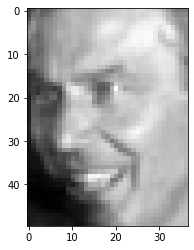

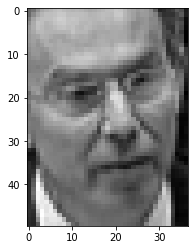

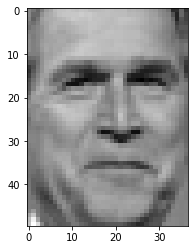

(1850, 1850)
(1850,)


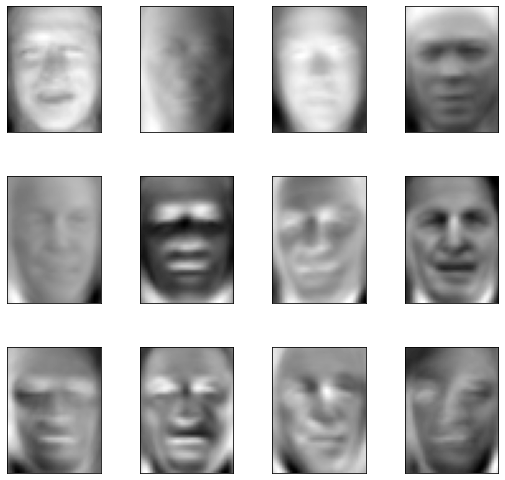

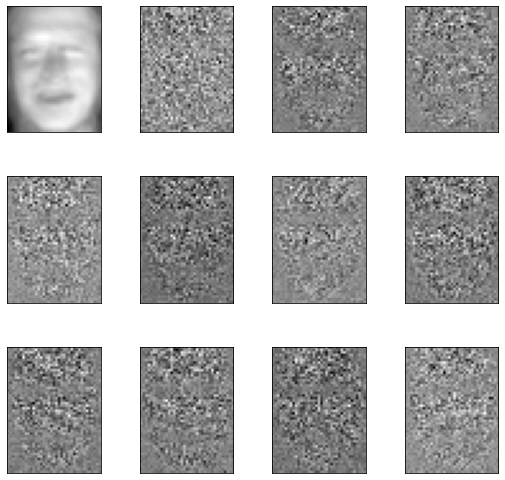

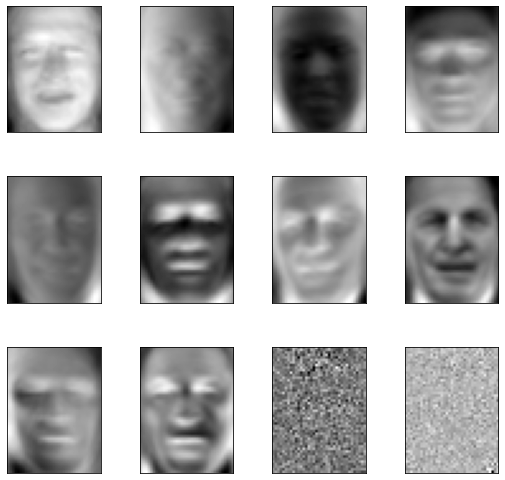

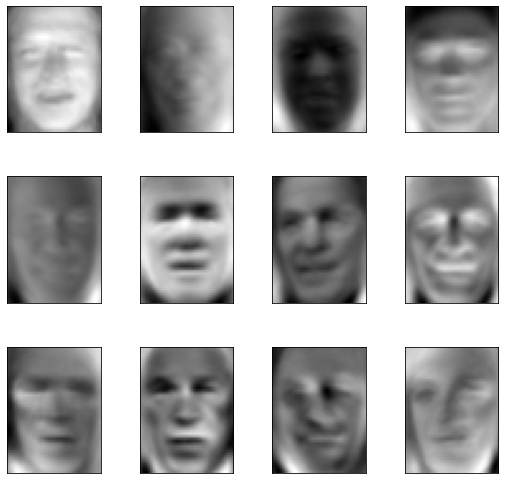

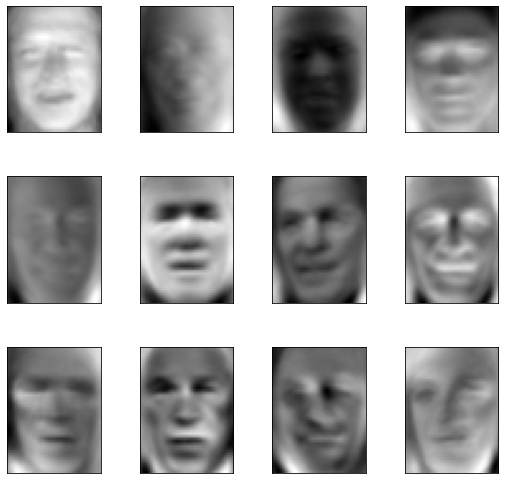

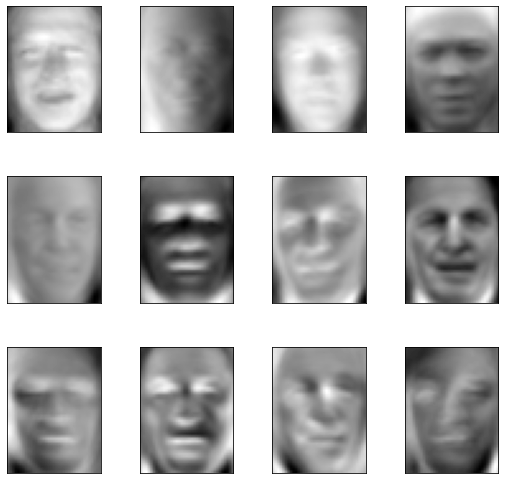

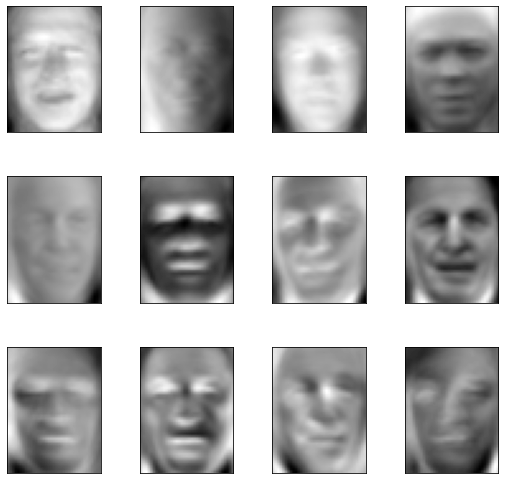

In [ ]:
######################################################################
# main
######################################################################

def main() :
    ### ========== TODO : START ========== ###
    # part 1a: explore LFW data set
    lfw_data_x, lfw_data_y = get_lfw_data()


    setXDim = len(lfw_data_x) # features
    setYDim = len(lfw_data_y) # target elements

    # print(setXDim)
    # print(setYDim)

    show_image(lfw_data_x[0])
    show_image(lfw_data_x[1])
    show_image(lfw_data_x[2])

    mean_dataset = [0 for i in range(setXDim)]
    x_dataset = [0 for i in range(setXDim)]

    for i in range(0,setXDim):
        x_dataset[i] = i+1
        mean_dataset[i] = lfw_data_x[i].mean()

    # print(len(mean_dataset))
    # print(len(x_dataset))
    # plt.figure(figsize=(8, 6))
    # plt.scatter(x_dataset, mean_dataset)
    # # x-axis label
    # plt.xlabel('Image')
    # # frequency label
    # plt.ylabel('Mean')
    # plt.show()

    ### ========== TODO : START ========== ###
    # part 1b: Perform PCA
    pca_U, pca_mu = PCA(lfw_data_x)
    print(pca_U.shape)
    print(pca_mu.shape)
    plot_gallery([vec_to_image(pca_U[:,i]) for i in range(12)])

    ### ========== TODO : START ========== ###
    # part 1c: Explore dimension variation in PCA
    l_list = [1,10,50,100,500,1288]
    for l in l_list:
      pca_z, pca_Ul = apply_PCA_from_Eig(lfw_data_x, pca_U, l, pca_mu)
      X_recon = reconstruct_from_PCA(pca_z, pca_Ul, pca_mu)
      pca_U2, pca_mu2 = PCA(X_recon)
      pca_U2_tmp = np.squeeze(pca_U2)
      plot_gallery([vec_to_image(pca_U2_tmp[:,i]) for i in range(12)])
    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
    # part 2d-2f: cluster toy dataset

    # 2d
    np.random.seed(1234)
    toy_set = generate_points_2d(20)
    kmeans_cluster_set = kMeans(toy_set, 3, init='random', plot=True)

    # 2e
    toy_set = generate_points_2d(20)
    kmeans_cluster_set = kMedoids(toy_set, 3, init='random', plot=True)

    # 2f
    toy_set = generate_points_2d(20)
    kmeans_cluster_set = kMeans(toy_set, 3, init='cheat', plot=True)

    toy_set = generate_points_2d(20)
    kmeans_cluster_set = kMedoids(toy_set, 3, init='cheat', plot=True)

    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
     # part 3a: cluster faces
    np.random.seed(1234)

    # # Dataset 1
    X1, y1 = util.limit_pics(lfw_data_x, lfw_data_y, [4, 6, 13, 16], 40)
    points = build_face_image_points(X1, y1)
    k=4
    # print("points: Size = " + str(len(points)))

    ClusteringScorePerformance(points, k, 'random', 10, "mean", dsNum=1)
    ClusteringScorePerformance(points, k, 'random', 10, "medoid", dsNum=1)

    # Dataset 2
    X2, y2 = util.limit_pics(lfw_data_x, lfw_data_y, [4, 6], 40)
    points2 = build_face_image_points(X2, y2)

    # print("points2: Size = " + str(len(points2)))

    ClusteringScorePerformance(points2, k, 'random', 10, "mean", dsNum=2)
    ClusteringScorePerformance(points2, k, 'random', 10, "medoid", dsNum=2)


    # part 3b: explore effect of lower-dimensional representations on clustering performance
    np.random.seed(1234)


    # part 3c: determine ``most discriminative'' and ``least discriminative'' pairs of images
    np.random.seed(1234)


    ### ========== TODO : END ========== ###


if __name__ == "__main__" :
    main()